In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataprocessor

In [2]:
dict_kinect, bones_kinect = dataprocessor.kinect_dict_data("G3-Kinect-RTK-P1T1-Unknown-C-0.txt")
dict_vicon, bones_vicon = dataprocessor.vicon_dict_data("G3-Vicon-RTK-P1T1-Unknown-C-0.txt")


kinect_rh = dict_kinect['HandRight'][:,:3]
vicon_rh = dict_vicon['Right Hand'][:,:3]
kinect_lh = dict_kinect['HandLeft'][:,:3]
vicon_lh = dict_vicon['Left Hand'][:,:3]


kinect_rs = dict_kinect['ShoulderRight'][:,:3]
vicon_rs = dict_vicon['Right Shoulder'][:,:3]
kinect_ls = dict_kinect['ShoulderLeft'][:,:3]
vicon_ls = dict_vicon['Left Shoulder'][:,:3]
kinect_c = dict_kinect['SpineBase'][:,:3]
vicon_c = dict_vicon['Hips'][:,:3]
kinect_h = dict_kinect['Head'][:,:3]
vicon_h = dict_vicon['Head'][:,:3]
kinect_rf = dict_kinect['FootRight'][:,:3]
vicon_rf = dict_vicon['Right Foot'][:,:3]
kinect_lf = dict_kinect['FootLeft'][:,:3]
vicon_lf = dict_vicon['Left Foot'][:,:3]




kinect_data = [kinect_rs, kinect_ls, kinect_c, kinect_h, kinect_rf, kinect_lf, kinect_rh, kinect_lh]
vicon_data = [vicon_rs, vicon_ls, vicon_c, vicon_h, vicon_rf, vicon_lf, vicon_rh, vicon_lh]



In [3]:
dict_kinect['HandRight'][:,:3].shape

(193, 3)

In [4]:
cut_off, sampling, order = 2, 30, 4

for kinect in kinect_data:
    for column in range(3):
        kinect[:, column] = dataprocessor.apply_butterworth_lowpass_filter(kinect[:, column], cut_off, sampling, order)

for vicon in vicon_data:
    for column in range(3):
        vicon[:, column] = dataprocessor.apply_butterworth_lowpass_filter(vicon[:, column], cut_off, sampling, order)


for index, kinect in enumerate(kinect_data):
    kinect_resampled = dataprocessor.resample_signal(kinect, original_sr=30, target_sr=60)
    kinect_data[index], vicon_data[index] = dataprocessor.make_length_similar(kinect_resampled, vicon_data[index])

  

In [5]:
kinect_rs.shape

(193, 3)

In [6]:
u = kinect_data[0] - kinect_data[2] # rs - c
i_hat = u/np.linalg.norm(u, axis=0)
v = kinect_data[1] - kinect_data[2] # ls - c
cps = np.cross(i_hat, v, axisa=1, axisb=1, axisc=0)
j_hat = cps/np.linalg.norm(cps, axis=0)
k_hat = np.cross(i_hat, j_hat, axisa=1, axisb=0, axisc=0)
f_hat_kinect = j_hat[:, 0].copy()

In [7]:
u = vicon_data[0] - vicon_data[2] # rs - c
i_hat = u/np.linalg.norm(u, axis=0)
v = vicon_data[1] - vicon_data[2] # ls - c
cps = np.cross(i_hat, v, axisa=1, axisb=1, axisc=0)
j_hat = cps/np.linalg.norm(cps, axis=0)
k_hat = np.cross(i_hat, j_hat, axisa=1, axisb=0, axisc=0)
f_hat_vicon = j_hat[:, 0].copy()

In [8]:
f_hat_kinect, f_hat_vicon

(array([0.40768443, 0.3198428 , 0.85527422]),
 array([-0.91309818,  0.3622734 , -0.1871088 ]))

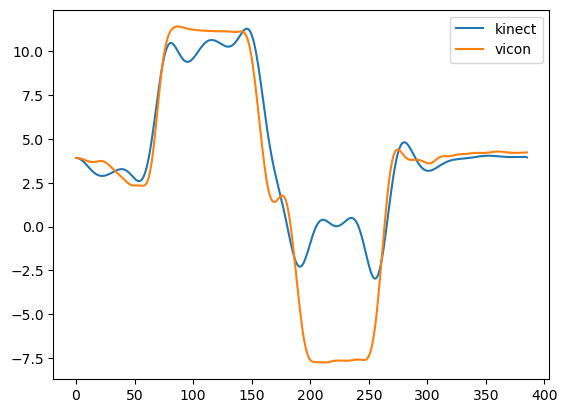

In [12]:
s_hats_kinect = kinect_data[0] - kinect_data[1]
s_hats_vicon = vicon_data[0] - vicon_data[1]

rot_kinect = np.rad2deg(np.arccos(np.dot(f_hat_kinect, s_hats_kinect.T)))
rot_vicon = np.rad2deg(np.arccos(np.dot(f_hat_vicon, s_hats_vicon.T)))

offset = rot_kinect[0] - rot_vicon[0]
rot_kinect -= offset

plt.plot(rot_kinect-90, label='kinect')
plt.plot(rot_vicon-90, label='vicon')
plt.legend()
plt.show()



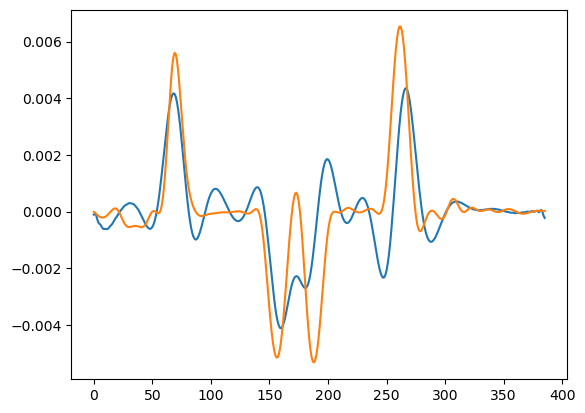

In [13]:
plt.plot(np.gradient(rot_kinect-90)/120)
plt.plot(np.gradient(rot_vicon-90)/120)

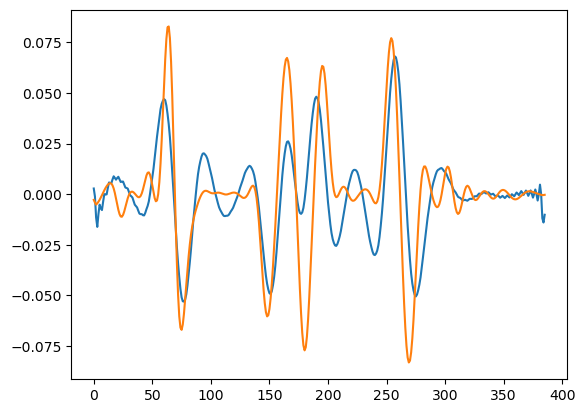

In [14]:
plt.plot(np.gradient(np.gradient(rot_kinect-90)))
plt.plot(np.gradient(np.gradient(rot_vicon-90)))